In [4]:
from sqlalchemy import create_engine
import psycopg2


In [5]:
conn = psycopg2.connect(dbname="experiments", user="arsen", password="arsen", host="localhost")
cursor = conn.cursor()

In [6]:
import random

def get_random_number(minval, maxval, none_probability):
    if random.random() < none_probability:
        return None
    else:
        return random.randint(minval, maxval)

In [7]:
def set_values():
    list = [ (get_random_number(1, 10**6, 0.05), get_random_number(1, 10**6, 0.05), 
    random.randint(1, 10**6), random.randint(1, 10**6)) for i in range(10**3)]
    cursor.executemany("INSERT INTO test_counts (fni, fwi, fni_nn, fwi_nn) VALUES ( %s, %s, %s, %s)", list)
    conn.commit()

In [8]:
import time
def get_time(str):
    time_begin = time.time()
    cursor.execute("SELECT count({}) FROM test_counts".format(str))
    time_finish = time.time()
    return time_finish - time_begin

In [9]:
times = [[0]*1000 for i in range(7)]

def get_time_queries():
    
    for i in range(1000):
        for j in range(10):
            set_values()
        
        times[0][i] = get_time('*')
        times[1][i] = get_time('id')
        times[2][i] = get_time('1')
        times[3][i] = get_time('fni')
        times[4][i] = get_time('fwi')
        times[5][i] = get_time('fni_nn')
        times[6][i] = get_time('fwi_nn')
        
        
get_time_queries()

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style(style='darkgrid')

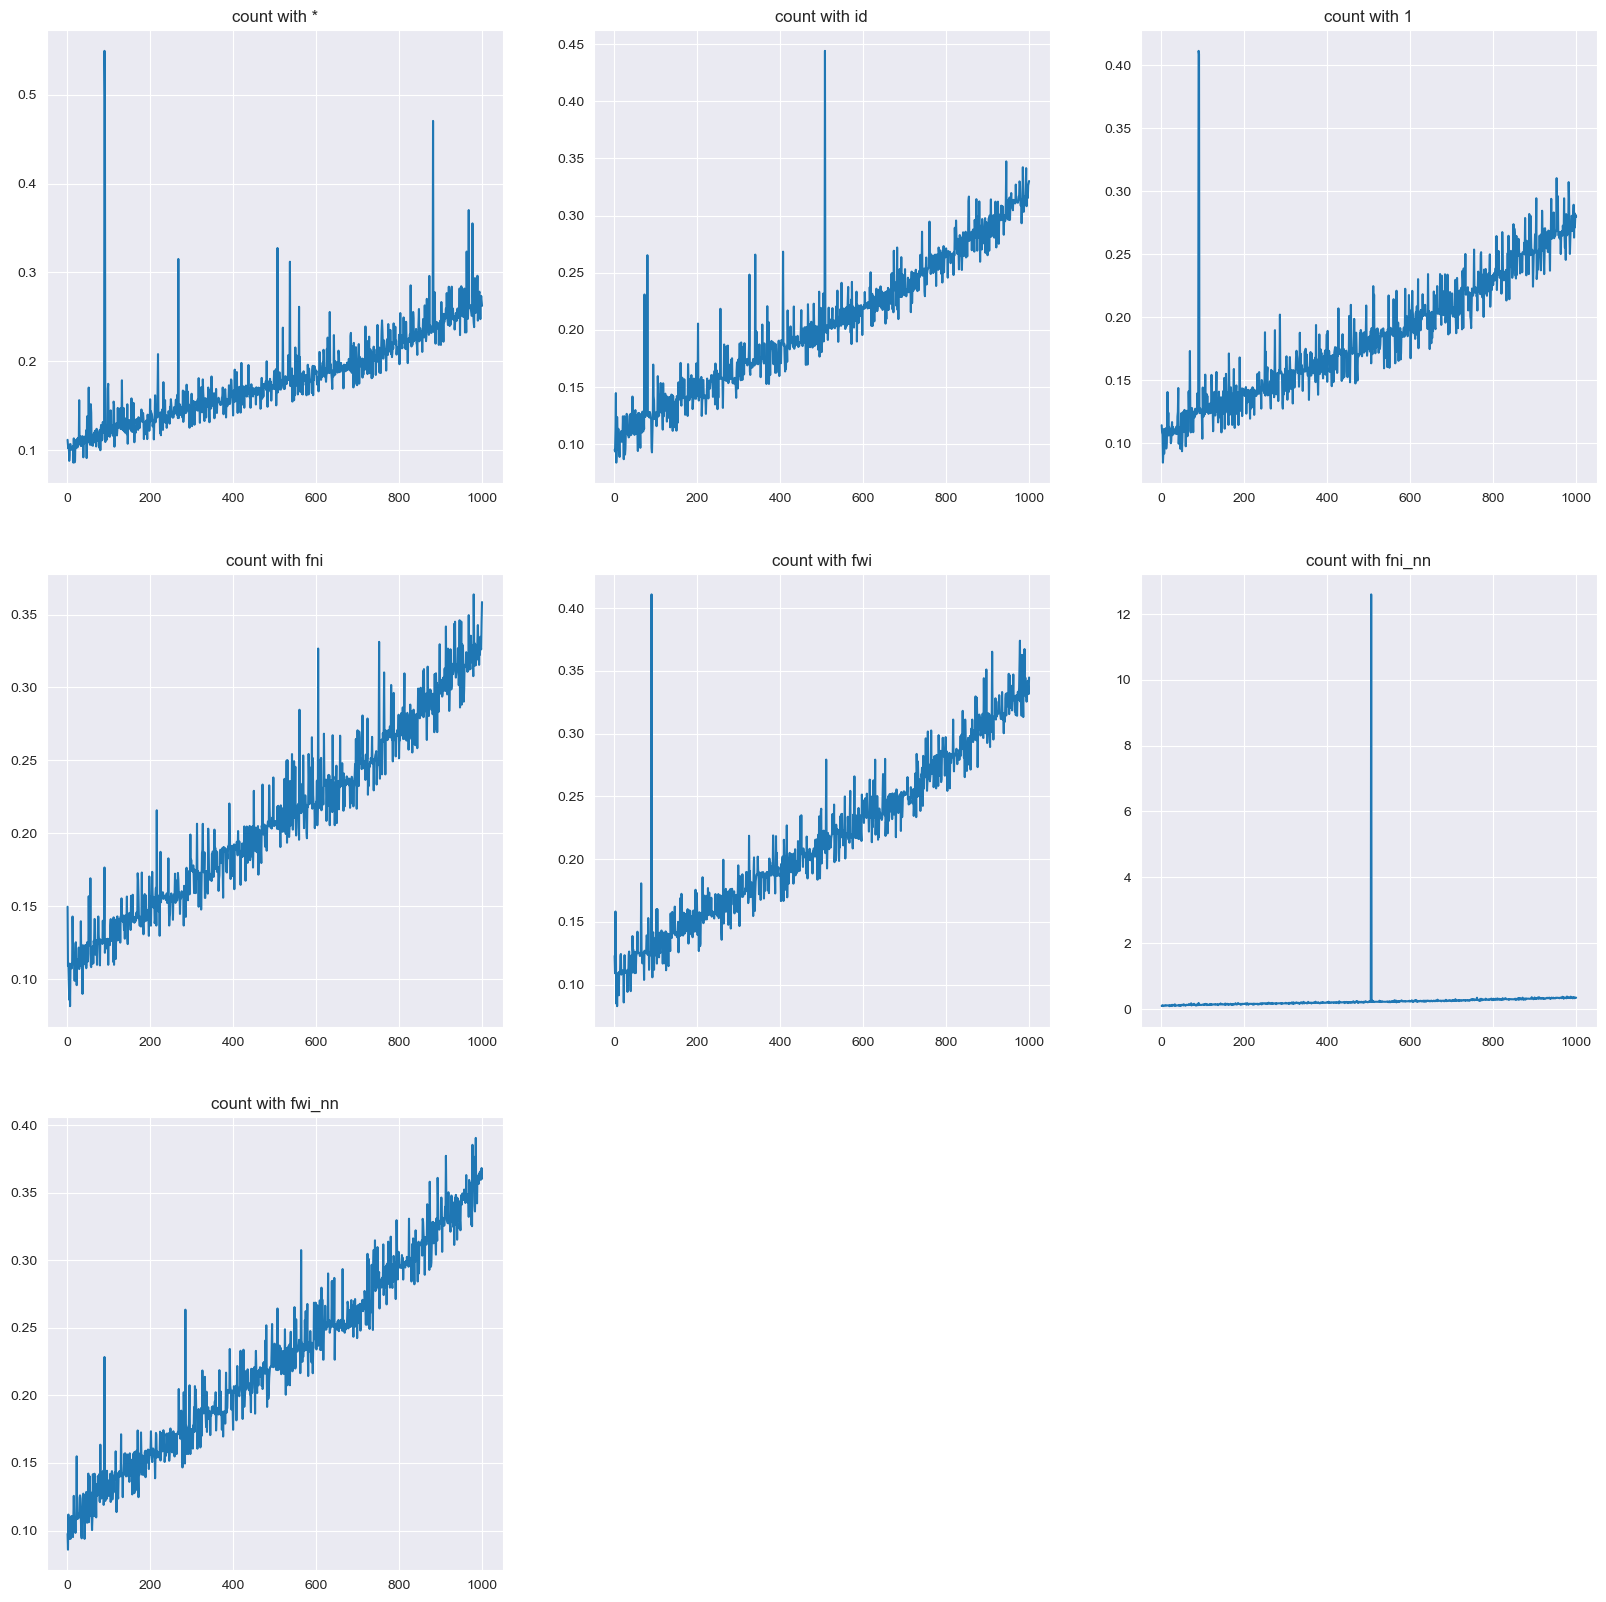

In [19]:

fig, ax = plt.subplots(3, 3)
fig.set_figheight(20)
fig.set_figwidth(20)
ax[0][0].plot(np.arange(1, 1001), np.array(times[0]), label = '*')
ax[0][0].set_title('count with *')
ax[0][1].plot(np.arange(1, 1001), np.array(times[1]), label = 'id')
ax[0][1].set_title('count with id')
ax[0][2].plot(np.arange(1, 1001), np.array(times[2]), label = '1')
ax[0][2].set_title('count with 1')
ax[1][0].plot(np.arange(1, 1001), np.array(times[3]), label = 'fni')
ax[1][0].set_title('count with fni')
ax[1][1].plot(np.arange(1, 1001), np.array(times[4]), label = 'fwi')
ax[1][1].set_title('count with fwi')
ax[1][2].plot(np.arange(1, 1001), np.array(times[5]), label = 'fni_nn')
ax[1][2].set_title('count with fni_nn')
ax[2][0].plot(np.arange(1, 1001), np.array(times[6]), label = 'fwi_nn')
ax[2][0].set_title('count with fwi_nn')
fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])


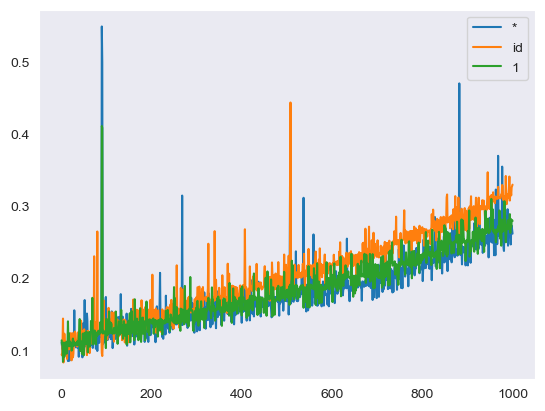

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(1, 1001), np.array(times[0]), label = '*')
plt.plot(np.arange(1, 1001), np.array(times[1]), label = 'id')
plt.plot(np.arange(1, 1001), np.array(times[2]), label = '1')
plt.grid()
plt.legend()

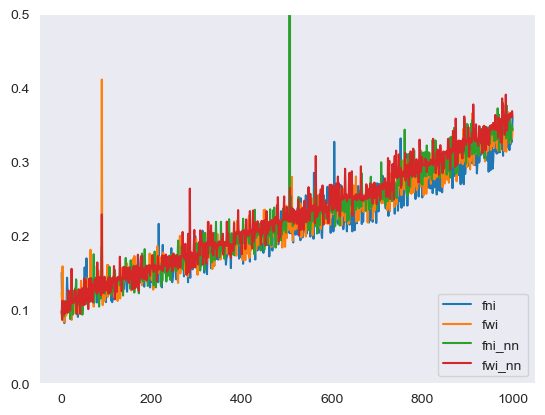

In [26]:
plt.plot(np.arange(1, 1001), np.array(times[3]), label = 'fni')
plt.plot(np.arange(1, 1001), np.array(times[4]), label = 'fwi')
plt.plot(np.arange(1, 1001), np.array(times[5]), label = 'fni_nn')
plt.plot(np.arange(1, 1001), np.array(times[6]), label = 'fwi_nn')

plt.ylim(0, 0.5)
plt.grid()
plt.legend()

(0.0, 0.5)

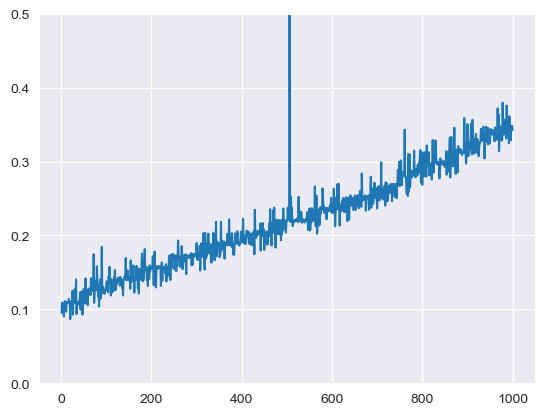

In [24]:
plt.plot(np.arange(1, 1001), np.array(times[5]))
plt.ylim(0, 0.5)